# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [14]:
# Libraries
import numpy as np
# Your Code Here
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)  # tamaño por defecto, decenas de pixeles

import pandas as pd
pd.set_option('display.max_columns', None)

import scipy.stats
from scipy.stats import spearmanr

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [15]:
# your answer here
fitbit = pd.read_csv('..//data//Fitbit2.csv', encoding='latin1')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [16]:
fitbit.describe(include='object').T

,count,unique,top,freq
Date,367,366,2016-02-05,2
Days,367,7,Friday,54
Months,367,12,May,31


In [17]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000000,2974.000000,3233.000000,4351.000000
Steps,367.0,10121.588556,5594.836225,0.000,6730.500000,10413.000000,13916.500000,26444.000000
Distance,367.0,8.549128,3.409881,0.000,6.155000,8.290000,10.560000,20.450000
Floors,367.0,11.724796,10.337370,0.000,5.000000,11.000000,16.000000,101.000000
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000000,663.000000,756.500000,998.000000
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000000,226.000000,290.000000,472.000000
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000000,24.000000,41.500000,101.000000
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500000,29.000000,54.000000,153.000000
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500000,1553.000000,1927.500000,9830.000000
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000000,337.000000,400.500000,553.000000


In [18]:
fitbit.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [22]:
fitbit.columns = [c.lower().replace('_', ' ') for c in fitbit.columns] #con esto ponemos todo en minusculas y reemplazamos las _ por espacio, son buenas practicas
fitbit

,date,calorie burned,steps,distance,floors,minutes sedentary,minutes lightly active,minutes fairly active,minutes very active,activity calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes,distance miles,days,days encoded,work or weekend,hours sleep,sleep efficiency,yesterday sleep,yesterday sleep efficiency,months,months encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [29]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
mean_change_by_month = fitbit.groupby('months encoded')['steps'].median()
mean_change_by_month

months encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: steps, dtype: float64

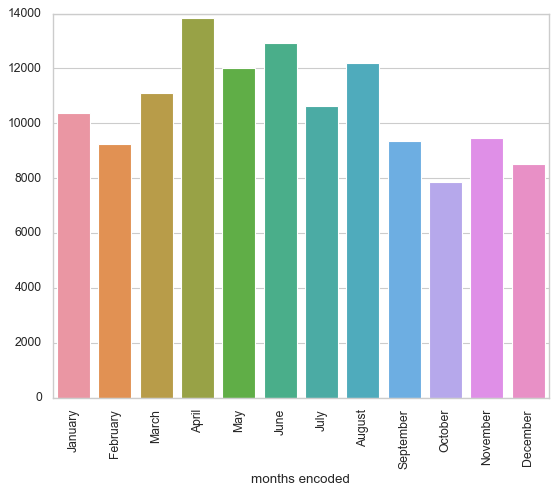

In [90]:
months = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')

sns.barplot(x=mean_change_by_month.index,
            y = mean_change_by_month.values)

plt.figsize=(12, 4)
plt.xticks(range (0, 12), months, rotation=90);

plt.savefig('figures/mean_change_by_month.png');
#plt.xlabel = months;

In [31]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
mean_change_week_or_weekend = fitbit.groupby('work or weekend')['steps'].mean()
mean_change_week_or_weekend

work or weekend
0    10064.238095
1    10144.572519
Name: steps, dtype: float64

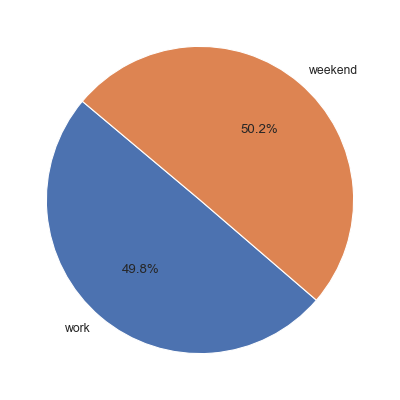

In [91]:
plt.pie(mean_change_week_or_weekend, labels = ['work', 'weekend'], autopct='%1.1f%%', startangle=140)
plt.savefig('figures/mean_change_week_or_weekend.png');

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

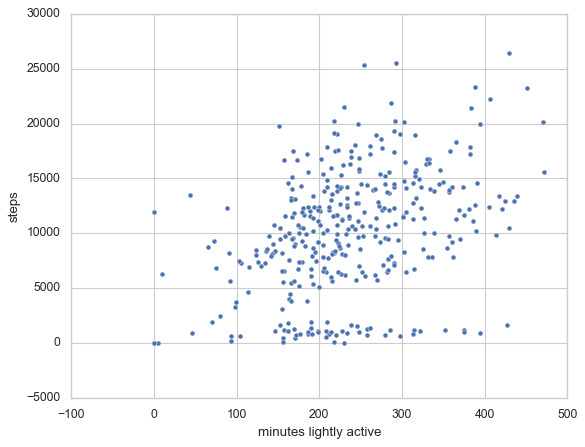

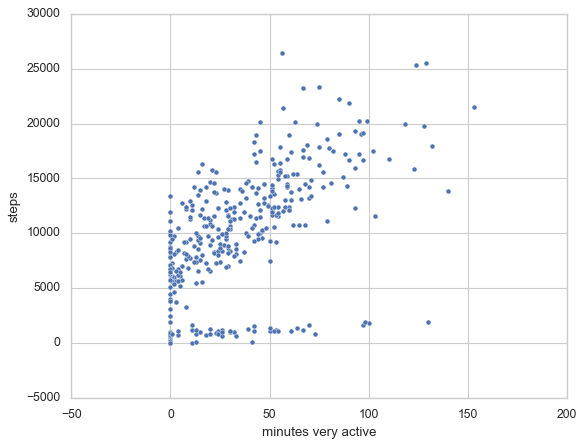

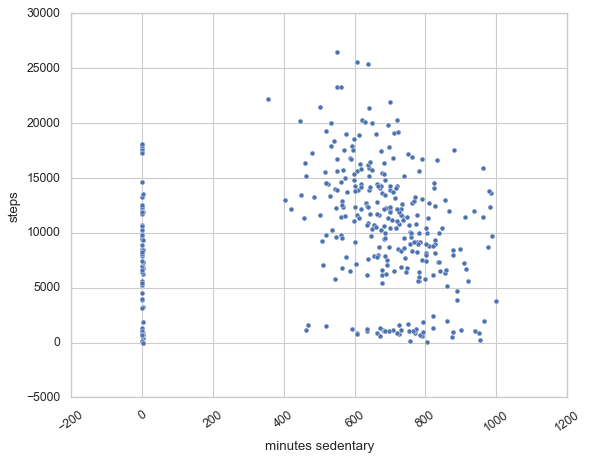

In [92]:
# your code here
features = ['minutes lightly active', 'minutes very active', 'minutes sedentary']

for e in features:
    plt.figure(figsize= (8,6))
    sns.scatterplot(data=fitbit,
                    x = e,
                    y = "steps")
    
    plt.ylabel('steps')
    plt.grid(True)

plt.xticks(rotation=35);
plt.savefig('figures/features.png');


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [52]:
# your code here

titanic = pd.read_csv('..//data//titanic.csv', encoding='latin1')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [55]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [57]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [60]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['category', 'object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [76]:
# your code here
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6));

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

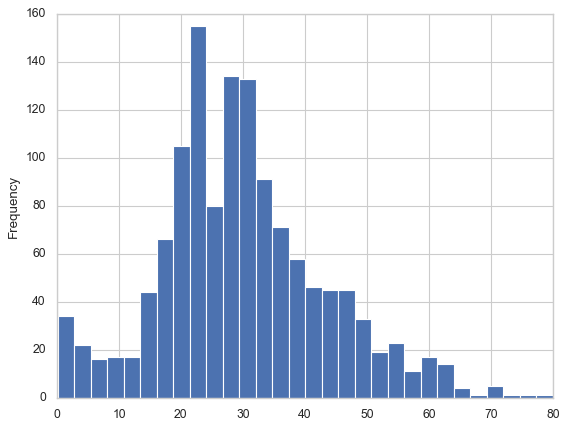

In [93]:
# your code here
age = titanic['Age'].plot.hist(bins=30);
plt.savefig('figures/age.png');

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

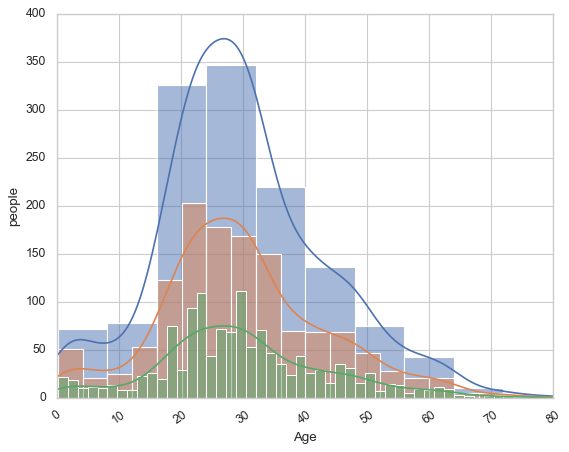

In [95]:
bins = [10, 20 , 50]

for i in bins:
    sns.histplot(data = titanic.Age, bins = i, kde = True)
    
    plt.xticks(rotation=35)
    plt.ylabel('people')
    
    plt.savefig('figures/age_bins.png');

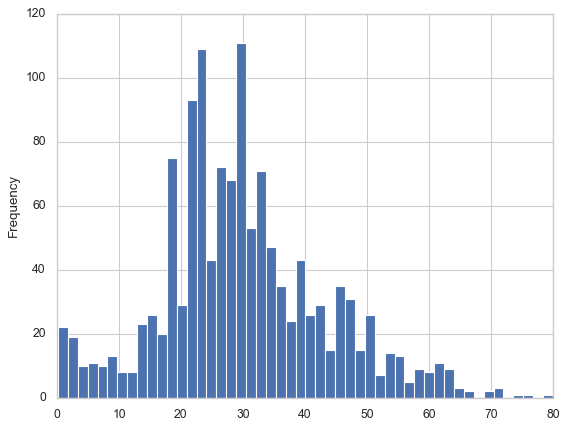

In [82]:
titanic['Age'].plot.hist(bins=50);

#### How does the bin size affect your plot?

In [ ]:
"""
cambia el tamaño de las columnas, las vemos superpuestas y nos da mayor precision de los datos
"""

#### Use seaborn to show the distribution of column `Age`.

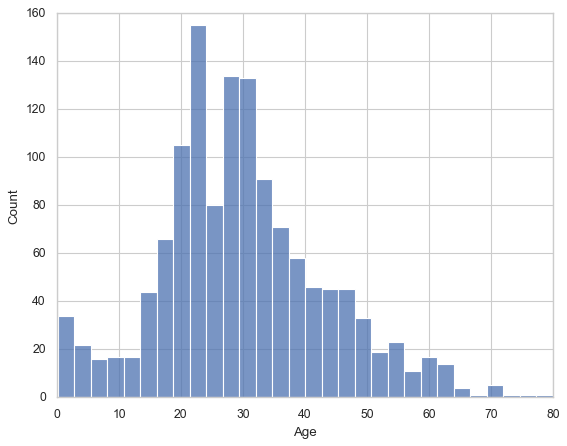

In [97]:
# your code here
sns.histplot(data=titanic, x="Age");

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

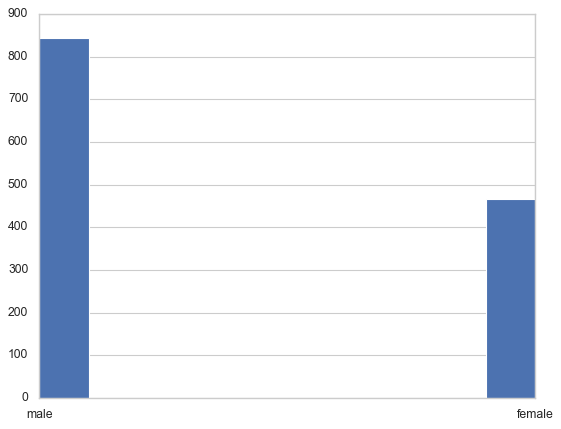

In [101]:
# Method 1 - matplotlib
# your code here
gender = plt.hist(titanic['Gender'])
plt.savefig('figures/gender.png')

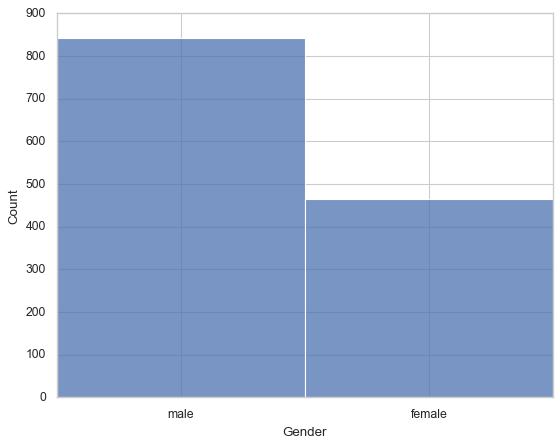

In [102]:
# Method 2 - seaborn
# your code here
gender2=sns.histplot(data=titanic, x='Gender')
plt.savefig('figures/gender2.png');

#### Use the right plot to visualize the column `Pclass`.

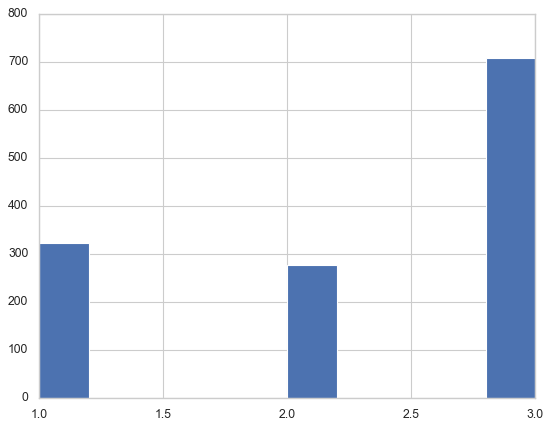

In [103]:
# your code here
pclass=plt.hist(titanic['Pclass'])
plt.savefig('figures/pclass.png');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [105]:
# your code here
titanic.Age.describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

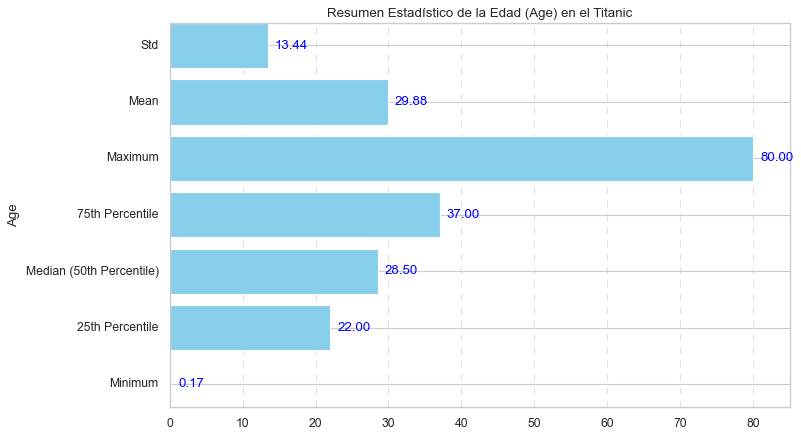

In [107]:
# Datos del resumen estadístico
data = {
    'Minimum': 0.17,
    '25th Percentile': 22,
    'Median (50th Percentile)': 28.5,
    '75th Percentile': 37,
    'Maximum': 80,
    'Mean': 29.88,
    'Std': 13.44
}

# Extraer las etiquetas y valores del diccionario
labels = list(data.keys())
values = list(data.values())

# Creo un gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.ylabel('Age')  # Establecer etiqueta del eje y
plt.title('Resumen Estadístico de la Edad (Age) en el Titanic')  # Establecer título
plt.xlim(0, 85)  # Ajusta el rango del eje x
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Vemos el valor en cada barra
for i, v in enumerate(values):
    plt.text(v + 1, i, f'{v:.2f}', color='blue', va='center')

# Muestra el gráfico
plt.show()


#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
que la edad media son 30 años y esta muy cercana a la mediana
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

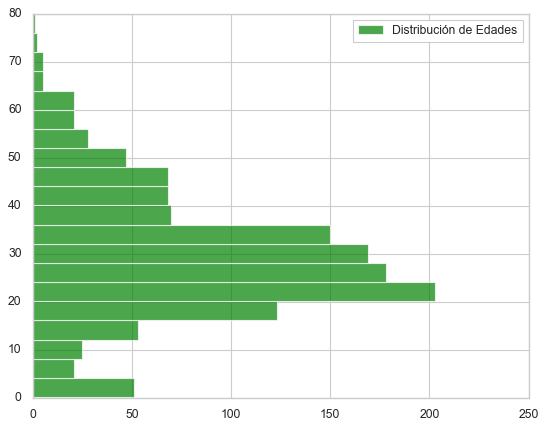

In [112]:
# your code here

# Incluyo la informacion por edad 

plt.hist(titanic.Age, bins=20, orientation='horizontal', color='green', alpha=0.7, label='Distribución de Edades')
plt.legend();

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

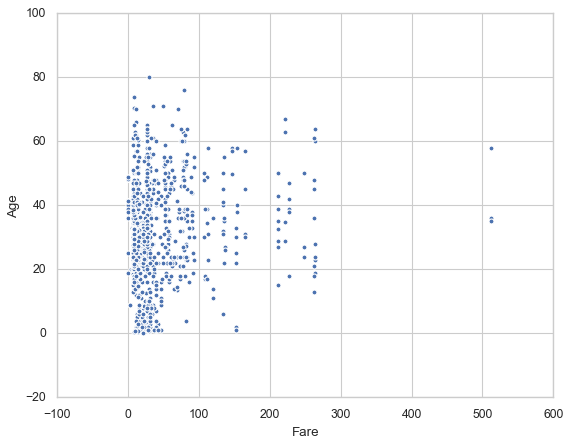

In [114]:
# Method 1 - matplotlib
# your code here
titanic.plot.scatter(x='Fare', y='Age');

<Axes: xlabel='Fare', ylabel='Age'>

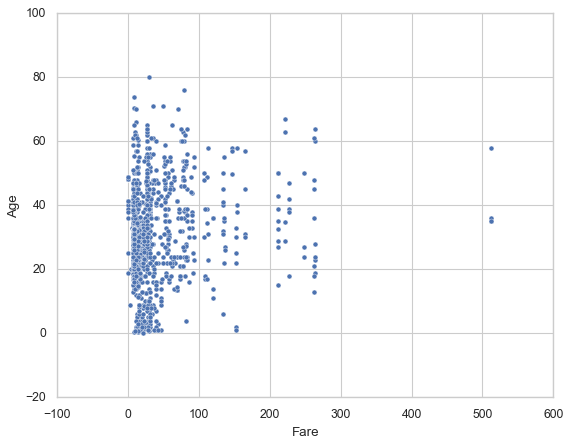

In [116]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x="Fare", y = "Age")

#### Plot the correlation matrix using seaborn.

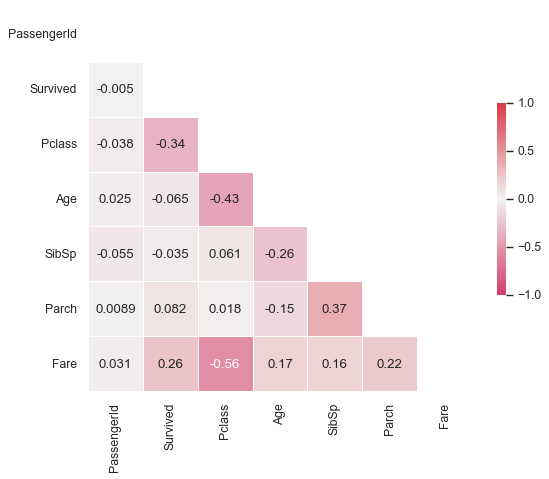

In [127]:
# your code here

numeric_columns = titanic.select_dtypes(exclude=['object'])

corr=numeric_columns.corr(method='pearson')

sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # mapa de color
            
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
            
           );

#### What are the most correlated features?

In [ ]:
"""
Parch
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Pclass', ylabel='Age'>

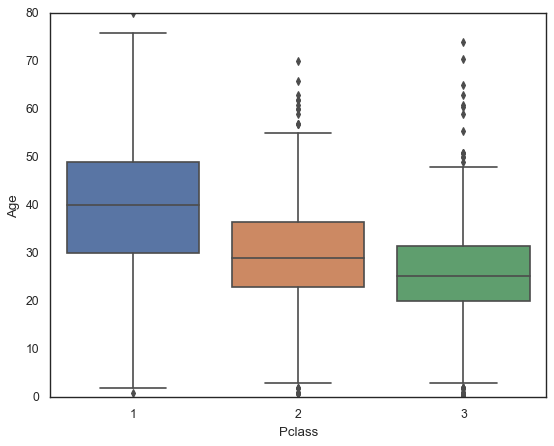

In [128]:
# your code here
sns.boxplot(x="Pclass", y="Age", data=titanic) 

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

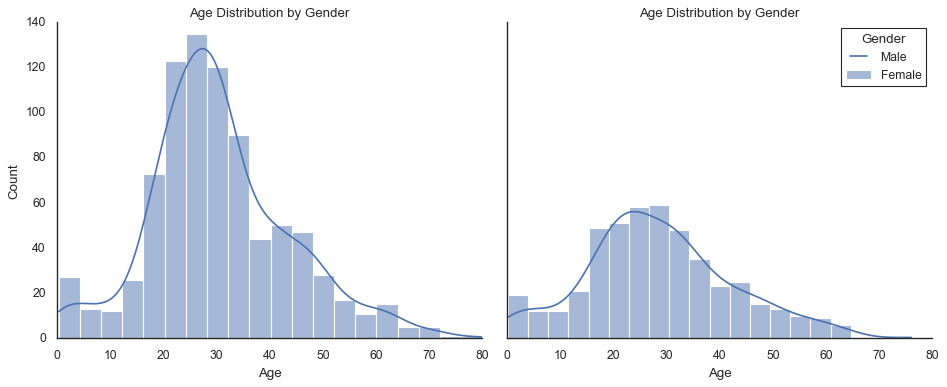

In [129]:
# your code here

g = sns.FacetGrid(titanic, col="Gender", height=5, aspect=1.2)

g.map(sns.histplot, "Age", bins=20, kde=True)

# Titluos y etiquetas
g.set_axis_labels("Age", "Count")
g.set_titles("Age Distribution by Gender")

# Incluyo legenda
plt.legend(title='Gender', labels=['Male', 'Female'])

plt.show()
